Karinn Murdock

03/14/2022

# Project Title 

## Introduction

### Research Question and Importance

For my final project, I am exploring the music industry and how it has changed over the years. More specifically, I want to look at how music industry sales have changed in the past 40 years in terms of type of sales (CDs, paid subscription, etc). This topic is important in order to understand how the music industry sales have shifted and how customer preferences have changed. This topic is of interest to me as I'm extremely interested in the music industry and potentially working on the business side of the music industry after graduation. This topic is important to artists and companies within the industry as they must understand the current landscape and how to maximize sales and cater to customer's preferences. 

### Data Source

The data source I will use to explore this question is a dataset on music industry sales over the past 40 years created by the Recording Industry Association of America (RIAA). According to RIAA, this is the most comprehensive data on U.S. recorded music revenues. This dataset goes all the way back to 1973 and lists format of sale, year of sale, and quantity of sale. A link to the dataset can be found here: https://data.world/makeovermonday/2020w21-visualizing-40-years-of-music-industry-sales

### Analysis and Visualizations

I chose this dataset as I intend to analyze how music industry sales have changed since 1973. I intend to analyze whether sales in general have increased or decreased as well as how the format of sales have changed between 1973 and now. For visualizations, I plan to use pie charts to show the breakdown of format of sales for each year. I also plan to create bar charts to show the number of sales each year from 1973 to now. 

## Methods

## Results

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
df = pd.read_csv('MusicData2.csv')

In [3]:
df.shape

(3008, 5)

The dataset has 5 columns and 3008 rows of data.

In [4]:
df.columns

Index(['Format', 'Metric', 'Year', 'Number of Records', 'Value (Actual)'], dtype='object')

Looking at the first 5 entries:

In [5]:
df.head()

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


Looking at the last 5 entries:

In [6]:
df.tail()

,Format,Metric,Year,Number of Records,Value (Actual)
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [7]:
df.dtypes

Format                object
Metric                object
Year                   int64
Number of Records      int64
Value (Actual)       float64
dtype: object

Finding summary statistics:

In [8]:
df.describe()

,Year,Number of Records,Value (Actual)
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327790


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Format             3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [10]:
print(df)

            Format            Metric  Year  Number of Records  Value (Actual)
0               CD             Units  1973                  1             NaN
1               CD             Units  1974                  1             NaN
2               CD             Units  1975                  1             NaN
3               CD             Units  1976                  1             NaN
4               CD             Units  1977                  1             NaN
...            ...               ...   ...                ...             ...
3003  Vinyl Single  Value (Adjusted)  2015                  1        6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1        5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1        6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1        5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1        6.795946

[3008 rows x 5 columns]


Looking at the data, the column "Value (Actual)" has missing information for many of the data entries. Additionally, it seems some of the data in the "Value (Actual)" column is measuring units sold while other entries are measuring revenue.

### Cleaning the Data

First, I am replacing all NaN values with a zero.

In [11]:
new_df = df.fillna(0)
new_df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In some of the earlier years, certain formats such as CDs hadn't been created yet. I don't want to include these sales formats in my dataset for the years when the value is 0.0 so I am creating a new dataframe with these values removed.

In [12]:
# Creating a dataframe that only has the relevant formats for each year

In [13]:
new_df_no_values_0 = new_df[new_df["Value (Actual)"] != 0.0].reset_index(drop=True)
new_df_no_values_0

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.800000
1,CD,Units,1984,1,5.800000
2,CD,Units,1985,1,22.600000
3,CD,Units,1986,1,53.000000
4,CD,Units,1987,1,102.100000
...,...,...,...,...,...
1269,Vinyl Single,Value (Adjusted),2015,1,6.205390
1270,Vinyl Single,Value (Adjusted),2016,1,5.198931
1271,Vinyl Single,Value (Adjusted),2017,1,6.339678
1272,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [14]:
# There are only 1274 rows as compared to 3008 rows before since some of the rows were irrelevant. 

In [15]:
# creating a dataframe that has the units sold data for each year and format

In [16]:
units = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Units']
units

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1983,1,0.8
1,CD,Units,1984,1,5.8
2,CD,Units,1985,1,22.6
3,CD,Units,1986,1,53.0
4,CD,Units,1987,1,102.1
...,...,...,...,...,...
397,Paid Subscriptions,Units,2014,1,7.7
398,Paid Subscriptions,Units,2015,1,10.8
399,Paid Subscriptions,Units,2016,1,22.7
400,Paid Subscriptions,Units,2017,1,35.3


In [17]:
# creating a dataframe that has the Present Value Revenue data for each year and format

In [18]:
adjusted = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value (Adjusted)'].reset_index(drop=True)
adjusted

,Format,Metric,Year,Number of Records,Value (Actual)
0,8 - Track,Value (Adjusted),1973,1,2815.681824
1,8 - Track,Value (Adjusted),1974,1,2848.008609
2,8 - Track,Value (Adjusted),1975,1,2770.409498
3,8 - Track,Value (Adjusted),1976,1,3047.215772
4,8 - Track,Value (Adjusted),1977,1,3421.416287
...,...,...,...,...,...
431,Vinyl Single,Value (Adjusted),2015,1,6.205390
432,Vinyl Single,Value (Adjusted),2016,1,5.198931
433,Vinyl Single,Value (Adjusted),2017,1,6.339678
434,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [19]:
# creating a dataframe for Revenue at time of purchase for each year and format

In [20]:
value = new_df_no_values_0[new_df_no_values_0['Metric'] == 'Value'].reset_index(drop=True)
value

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Value,1983,1,17.200000
1,CD,Value,1984,1,103.300000
2,CD,Value,1985,1,389.500000
3,CD,Value,1986,1,930.100000
4,CD,Value,1987,1,1593.600000
...,...,...,...,...,...
431,Vinyl Single,Value,2015,1,5.752954
432,Vinyl Single,Value,2016,1,4.880680
433,Vinyl Single,Value,2017,1,6.078385
434,Vinyl Single,Value,2018,1,5.290337


### Exploratory Data Visualizations

In [21]:
# creating dataframes with the unit sales data for each format 

In [22]:
# step 1: get all unique Format types
unit_format_types = list(set(units["Format"]))
unit_format_types
# step 2: create an empty list to input new data_frames
unit_format_dfs = []
# step 3: create all the new data frames and add to list
for i in np.arange(len(unit_format_types)):
    unit_first_format_type = unit_format_types[i]
    unit_format_df = units[units["Format"] == unit_first_format_type]
    unit_format_dfs.append(unit_format_df)
    #print(format_df.head())

In [23]:
# creating dataframes with the Adjusted Revenue sales data for each format

In [24]:
# step 1: get all unique Format types
format_types = list(set(adjusted["Format"]))
format_types
# step 2: create an empty list to input new data_frames
format_dfs = []
# step 3: create all the new data frames and add to list
for i in np.arange(len(format_types)):
    first_format_type = format_types[i]
    format_df = adjusted[adjusted["Format"] == first_format_type]
    format_dfs.append(format_df)
    #print(format_df.head())

In [25]:
format_dfs[0] = adjusted[adjusted["Format"] == 'Download Music Video']
format_dfs[1] = adjusted[adjusted["Format"] == 'Download Album']
format_dfs[2] = adjusted[adjusted["Format"] == 'Other Ad-Supported Streaming']
format_dfs[3] = adjusted[adjusted["Format"] == 'Paid Subscription']
format_dfs[4] = adjusted[adjusted["Format"] == 'Synchronization']
format_dfs[5] = adjusted[adjusted["Format"] == 'Cassette']
format_dfs[6] = adjusted[adjusted["Format"] == 'On-Demand Streaming (Ad-Supported)']
format_dfs[7] = adjusted[adjusted["Format"] == 'Limited Tier Paid Subscription']
format_dfs[8] = adjusted[adjusted["Format"] == 'Ringtones & Ringbacks']
format_dfs[9] = adjusted[adjusted["Format"] == '8 - Track']
format_dfs[10] = adjusted[adjusted["Format"] == 'CD']
format_dfs[11] = adjusted[adjusted["Format"] == 'Vinyl Single']
format_dfs[12] = adjusted[adjusted["Format"] == 'CD Single']
format_dfs[13] = adjusted[adjusted["Format"] == 'Kiosk']
format_dfs[14] = adjusted[adjusted["Format"] == 'DVD Audio']
format_dfs[15] = adjusted[adjusted["Format"] == 'SACD']
format_dfs[16] = adjusted[adjusted["Format"] == 'Other Digital']
format_dfs[17] = adjusted[adjusted["Format"] == 'Other Tapes']
format_dfs[18] = adjusted[adjusted["Format"] == 'SoundExchange Distribution']
format_dfs[19] = adjusted[adjusted["Format"] == 'LP/EP']
format_dfs[20] = adjusted[adjusted["Format"] == 'Download Single']
format_dfs[21] = adjusted[adjusted["Format"] == 'Cassette Single']
format_dfs[22] = adjusted[adjusted["Format"] == 'Music Video (Physical)']

In [26]:
# could be cool to create a drop down menu with these options ....23 graphs total 

In [ ]:
def dataset_to_df(dataset):
    
    all_links = document.findAll('a')
    for link in all_links:
        if link.has_attr('download'):
            download_link = link['href']
    df = pd.read_csv(html_link + download_link)
    
    print(df.info())
    
    return df

w = ipywidgets.interactive(dataset_to_df,dataset=all_datasets)
display(w)

In [27]:
# plotting Download Music Video sales over the years

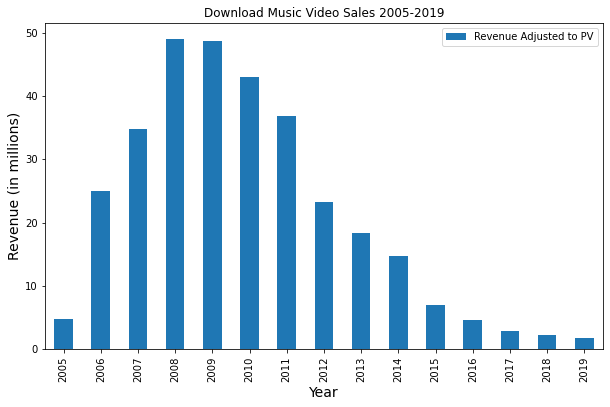

In [28]:
dmv = format_dfs[0].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

dmv.set_title('Download Music Video Sales 2005-2019')
dmv.set_xlabel('Year', fontsize=14)
dmv.set_ylabel('Revenue (in millions)', fontsize=14)
dmv.legend(['Revenue Adjusted to PV'])

In [29]:
# plotting Download Album sales over the years

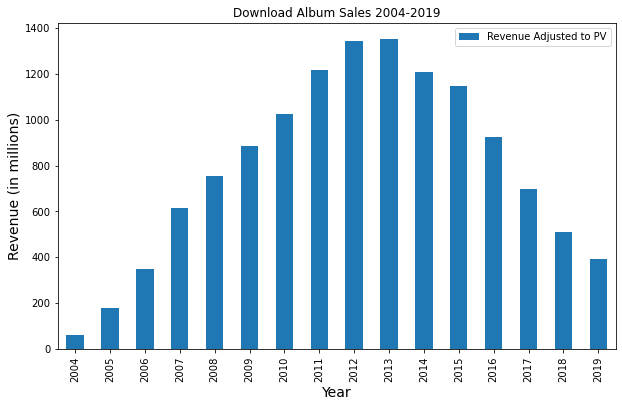

In [30]:
da = format_dfs[1].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

da.set_title('Download Album Sales 2004-2019')
da.set_xlabel('Year', fontsize=14)
da.set_ylabel('Revenue (in millions)', fontsize=14)
da.legend(['Revenue Adjusted to PV'])

In [31]:
# plotting Other Ad-Supported Streaming over the years

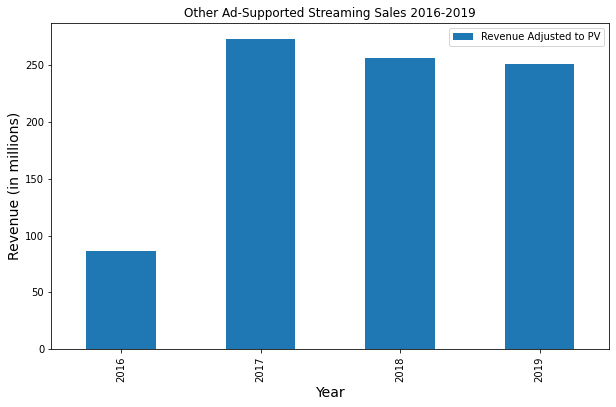

In [32]:
da = format_dfs[2].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

da.set_title('Other Ad-Supported Streaming Sales 2016-2019')
da.set_xlabel('Year', fontsize=14)
da.set_ylabel('Revenue (in millions)', fontsize=14)
da.legend(['Revenue Adjusted to PV'])

In [33]:
# plotting Paid Subscription sales over the years

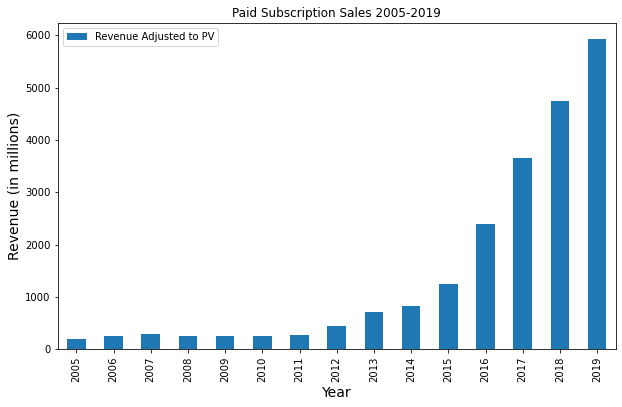

In [34]:
ps = format_dfs[3].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

ps.set_title('Paid Subscription Sales 2005-2019')
ps.set_xlabel('Year', fontsize=14)
ps.set_ylabel('Revenue (in millions)', fontsize=14)
ps.legend(['Revenue Adjusted to PV'])

In [35]:
# plotting CD single sales over the years

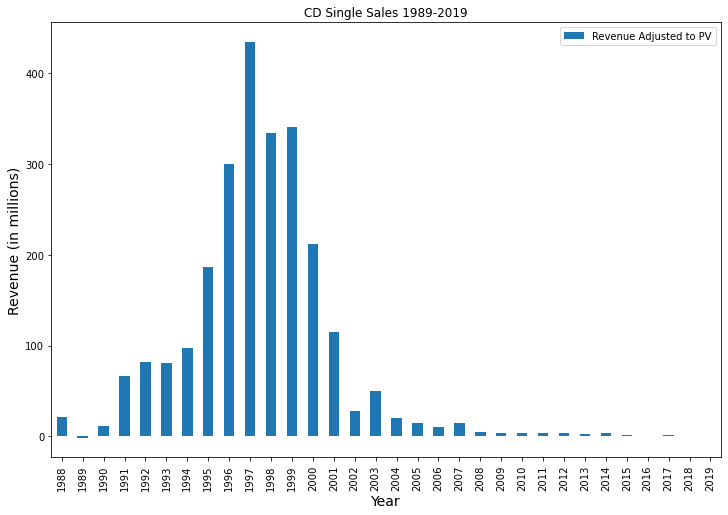

In [36]:
cds = format_dfs[12].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(12,8))

cds.set_title('CD Single Sales 1989-2019')
cds.set_xlabel('Year', fontsize=14)
cds.set_ylabel('Revenue (in millions)', fontsize=14)
cds.legend(['Revenue Adjusted to PV'])

In [37]:
# in years 2016, 2018, and 2019 the values are under 1 million and therefore very close to zero on this graph

In [38]:
# plotting Limited Tier Paid Subscription sales over the years

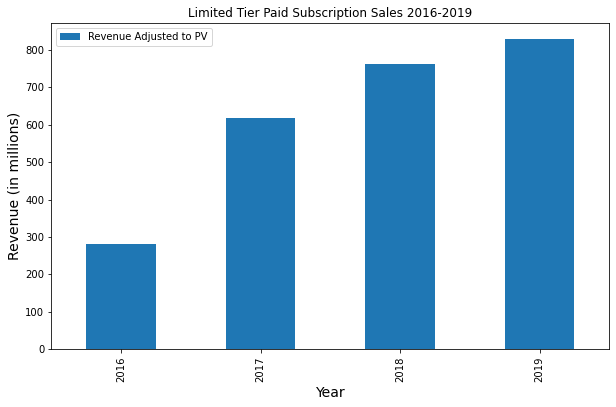

In [39]:
cds = format_dfs[7].plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,6))

cds.set_title('Limited Tier Paid Subscription Sales 2016-2019')
cds.set_xlabel('Year', fontsize=14)
cds.set_ylabel('Revenue (in millions)', fontsize=14)
cds.legend(['Revenue Adjusted to PV'])

In [40]:
# still need to plot for remaining formats

In [41]:
# looking at how composition of sales changed every 15 years

In [42]:
# looking at most popular format of sales in 1973

In [43]:
df_1973 = adjusted[adjusted['Year'] == 1973]

In [44]:
df_1973_index = df_1973.set_index("Format")
df_1973_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
8 - Track,Value (Adjusted),1973,1,2815.681824
Cassette,Value (Adjusted),1973,1,437.611081
LP/EP,Value (Adjusted),1973,1,7174.518514
Other Tapes,Value (Adjusted),1973,1,89.825432
Vinyl Single,Value (Adjusted),1973,1,1094.027703


In [45]:
# looking at most popular format of sales in 1988

In [46]:
df_1988 = adjusted[adjusted['Year'] == 1988]
df_1988_index = df_1988.set_index("Format")
df_1988_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),1988,1,4516.462927
CD Single,Value (Adjusted),1988,1,21.178686
Cassette,Value (Adjusted),1988,1,7315.507276
Cassette Single,Value (Adjusted),1988,1,123.830483
LP/EP,Value (Adjusted),1988,1,1150.132336
Vinyl Single,Value (Adjusted),1988,1,389.860717


In [47]:
# looking at most popular format of sales in 2003

In [48]:
df_2003 = adjusted[adjusted['Year'] == 2003]
df_2003_index = df_2003.set_index("Format")
df_2003_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2003,1,15607.443020
CD Single,Value (Adjusted),2003,1,50.019848
Cassette,Value (Adjusted),2003,1,150.198487
DVD Audio,Value (Adjusted),2003,1,11.115522
LP/EP,Value (Adjusted),2003,1,30.150853
Music Video (Physical),Value (Adjusted),2003,1,555.637143
SACD,Value (Adjusted),2003,1,36.542278
Vinyl Single,Value (Adjusted),2003,1,29.872965


In [49]:
# looking at most popular format of sales in 2018

In [50]:
df_2018 = adjusted[adjusted['Year'] == 2018]
df_2018_index = df_2018.set_index("Format")
df_2018_index

,Metric,Year,Number of Records,Value (Actual)
Format,,,,
CD,Value (Adjusted),2018,1,711.041239
CD Single,Value (Adjusted),2018,1,0.157981
DVD Audio,Value (Adjusted),2018,1,3.377494
Download Album,Value (Adjusted),2018,1,508.704388
Download Music Video,Value (Adjusted),2018,1,2.261051
Download Single,Value (Adjusted),2018,1,499.316974
Kiosk,Value (Adjusted),2018,1,2.000652
LP/EP,Value (Adjusted),2018,1,426.820187
Limited Tier Paid Subscription,Value (Adjusted),2018,1,760.591366


Text(0, 0.5, 'Revenue (in millions)')

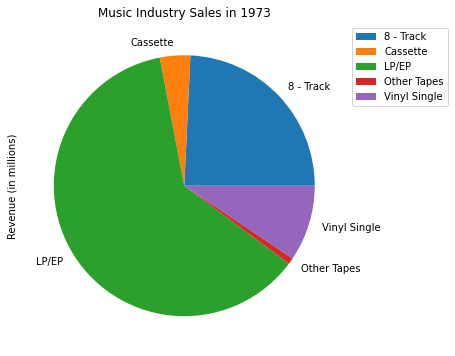

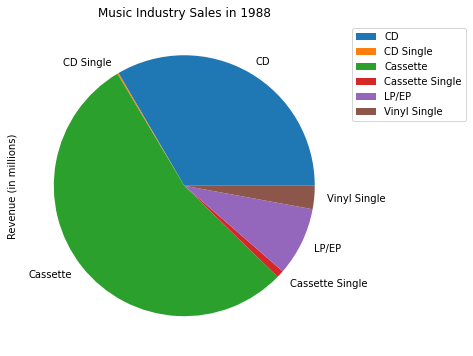

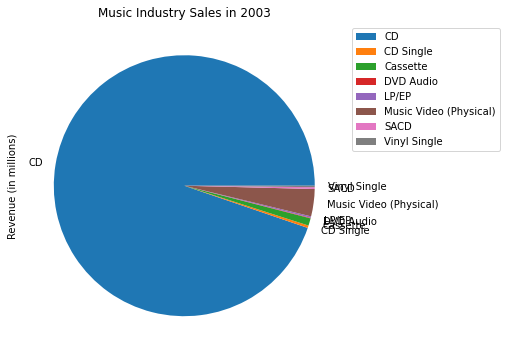

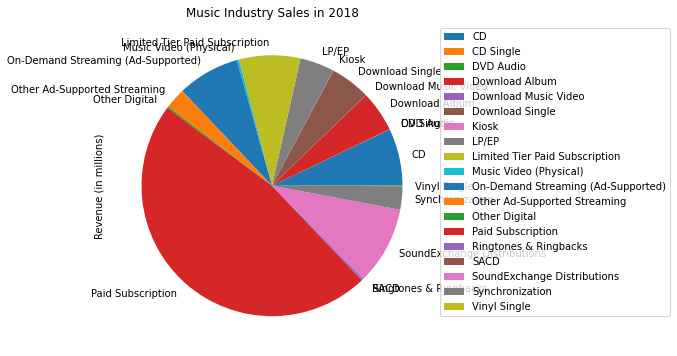

In [51]:
a = df_1973_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
a.set_title('Music Industry Sales in 1973')
a.set_ylabel('Revenue (in millions)')

b = df_1988_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
b.set_title('Music Industry Sales in 1988')
b.set_ylabel('Revenue (in millions)')

c = df_2003_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
c.set_title('Music Industry Sales in 2003')
c.set_ylabel('Revenue (in millions)')

d = df_2018_index.plot(kind='pie', y='Value (Actual)',figsize=(15,6))
plt.legend(bbox_to_anchor=(1.0, 1.0))
d.set_title('Music Industry Sales in 2018')
d.set_ylabel('Revenue (in millions)')

In [52]:
# need to clean up formatting ^

### Looking at Correlation

In [53]:
# looking at the correlation between paid subscription and CDs since 2005

In [54]:
cds_2005_on = format_dfs[10][format_dfs[10]['Year']>= 2005]

In [55]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(cds_2005_on['Value (Actual)'].reset_index(drop=True)))

-0.5719970540170898


In [56]:
# there's a negative correlation of -0.57

<AxesSubplot:xlabel='Year'>

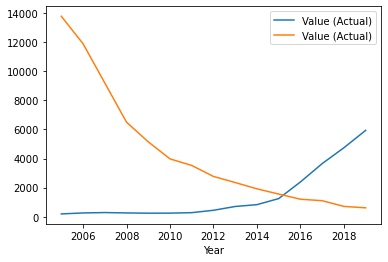

In [57]:
ax = format_dfs[3].plot(kind='line', x='Year', y='Value (Actual)')
cds_2005_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [58]:
# looking at the correlation between on-demand streaming and CDs since 2011

In [59]:
cds_2011_on = format_dfs[10][format_dfs[10]['Year']>= 2011]

In [60]:
print(cds_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.9323705630229808


In [61]:
# on demand streaming and CDs are very negatively correlated with a correlation of -0.93

<AxesSubplot:xlabel='Year'>

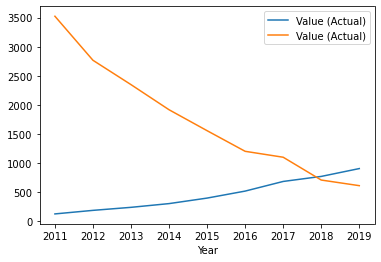

In [62]:
ax = format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)')
cds_2011_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [63]:
# looking at the correlation between paid subscription and cassettes since 2005

In [64]:
cassette_2005_on = format_dfs[5][format_dfs[5]['Year']>=2005]

In [65]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(cassette_2005_on['Value (Actual)'].reset_index(drop=True)))

-0.9141174644189466


<AxesSubplot:xlabel='Year'>

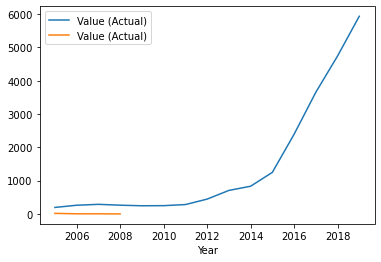

In [66]:
ax = format_dfs[3].plot(kind='line', x='Year', y='Value (Actual)')
cassette_2005_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [67]:
# correlation between PS and on demand streaming

In [68]:
ps_2011_on = format_dfs[3][format_dfs[3]['Year']>=2011]

In [69]:
print(ps_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

0.9851826999334489


In [70]:
# paid subscription and on demand streaming are very highly correlated with a correlation of 0.98

<AxesSubplot:xlabel='Year'>

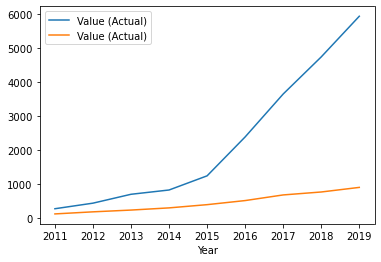

In [71]:
ax = ps_2011_on.plot(kind='line', x='Year', y='Value (Actual)')
format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [72]:
# correlation between on demand streaming and other ad-supported streaming after 2016

In [73]:
ods_2016_on = format_dfs[6][format_dfs[6]['Year']>=2016]

In [135]:
print(ods_2016_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[2]['Value (Actual)'].reset_index(drop=True)))

0.767500469481728


<AxesSubplot:xlabel='Year'>

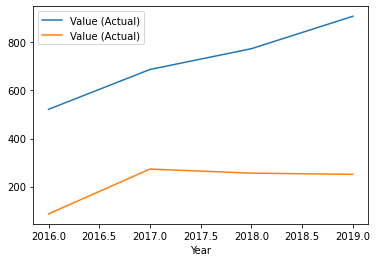

In [140]:
ax = ods_2016_on.plot(kind='line', x='Year', y='Value (Actual)')
format_dfs[2].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [139]:
format_dfs[6]

,Format,Metric,Year,Number of Records,Value (Actual)
294,On-Demand Streaming (Ad-Supported),Value (Adjusted),2011,1,129.340695
295,On-Demand Streaming (Ad-Supported),Value (Adjusted),2012,1,190.339616
296,On-Demand Streaming (Ad-Supported),Value (Adjusted),2013,1,242.396098
297,On-Demand Streaming (Ad-Supported),Value (Adjusted),2014,1,306.475448
298,On-Demand Streaming (Ad-Supported),Value (Adjusted),2015,1,401.245264
299,On-Demand Streaming (Ad-Supported),Value (Adjusted),2016,1,521.288175
300,On-Demand Streaming (Ad-Supported),Value (Adjusted),2017,1,686.918081
301,On-Demand Streaming (Ad-Supported),Value (Adjusted),2018,1,773.294917
302,On-Demand Streaming (Ad-Supported),Value (Adjusted),2019,1,908.149331


In [143]:
download_album_2011_on = format_dfs[1][format_dfs[1]['Year']>=2011]

In [144]:
print(download_album_2011_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.9715897248193843


In [145]:
# download album and on-demand streaming are very negatively correlated

<AxesSubplot:xlabel='Year'>

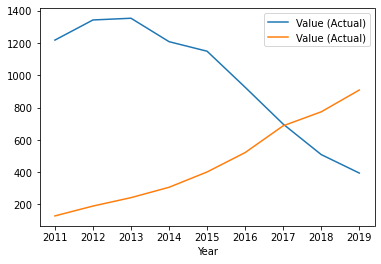

In [146]:
ax = download_album_2011_on.plot(kind='line', x='Year', y='Value (Actual)')
format_dfs[6].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [154]:
# correlation between downalod music video and download album

In [152]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[1]['Value (Actual)'].reset_index(drop=True)))

-0.07942243204594712


<AxesSubplot:xlabel='Year'>

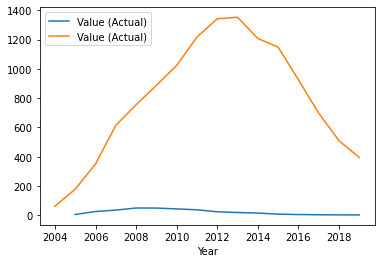

In [153]:
ax = format_dfs[0].plot(kind='line', x='Year', y='Value (Actual)')
format_dfs[1].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [167]:
# correlation between CD single and download single after 2004

In [164]:
cd_single_2004_on = format_dfs[12][format_dfs[12]['Year']>=2004]

In [165]:
print(cd_single_2004_on['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.4073087892744402


<AxesSubplot:xlabel='Year'>

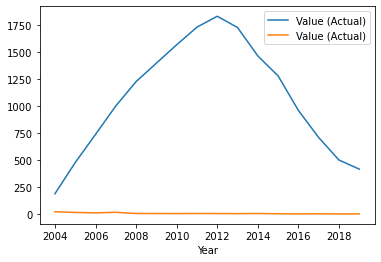

In [166]:
ax = format_dfs[20].plot(kind='line', x='Year', y='Value (Actual)')
cd_single_2004_on.plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

In [186]:
# correlation between other ad-supported streaming and limited tier paid subscription

In [187]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.8876592647894722


In [189]:
# other-ad supported streaming and limited tier paid subscription are highly correlated with a correlation of 0.89

<AxesSubplot:xlabel='Year'>

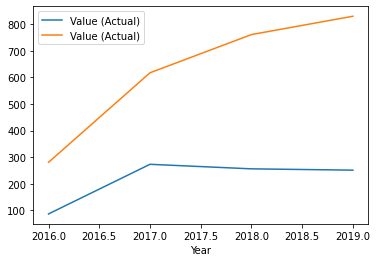

In [188]:
ax = format_dfs[2].plot(kind='line', x='Year', y='Value (Actual)')
format_dfs[7].plot(kind='line', x='Year', y='Value (Actual)', ax=ax)

# Correlation of Everything (To Be Deleted)

In [1050]:
# write code to find most negatively correlated ?

In [340]:
# paid subscription and CD single

In [56]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[1]['Value (Actual)'].reset_index(drop=True)))

-0.6290250309948311


In [342]:
# paid subscription and limited tier paid subscription

In [336]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[2]['Value (Actual)'].reset_index(drop=True)))

0.912909558880503


In [343]:
# paid subscription and other ad-supported streaming

In [337]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[3]['Value (Actual)'].reset_index(drop=True)))

0.932571837974312


In [344]:
# paid subscription and cassette single

In [347]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[4]['Value (Actual)'].reset_index(drop=True)))

-0.7070452842990597


In [346]:
# paid subscription and download single

In [348]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[5]['Value (Actual)'].reset_index(drop=True)))

-0.3268857583390543


In [349]:
# paid subscription and 8-track

In [350]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.9454551609004862


In [351]:
# paid subscription and kiosk

In [352]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

-0.441147156389329


In [353]:
# paid subscription and synchronization

In [354]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

0.843880201058094


In [355]:
# paid subscription and music video (single)

In [356]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.3257235988628691


In [357]:
# paid subscription and LP/EP

In [358]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

-0.8839985701771843


In [360]:
# paid subscription and vinyl single

In [361]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

-0.8133690365834714


In [362]:
# paid subscription and other digital

In [363]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.46713914282475255


In [364]:
# paid subscription and ringtones and ringbacks

In [365]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

-0.5703059144323466


In [366]:
# paid subscription and soundexchange distributions

In [367]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.7744466362621104


In [368]:
# paid subscription and CD

In [369]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.8489821440930545


In [370]:
# paid subscription and cassette

In [371]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.8683710010126304


In [372]:
# paid subscription and other tapes

In [373]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.7111568253659136


In [374]:
# paid subscription and download album

In [375]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

-0.017241645139646534


In [377]:
# paid subscription and on-demand streaming

In [378]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.7906914616750885


In [379]:
# paid subscription and download music video

In [382]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.6724654943557207


In [383]:
# paid subscription and DVD audio

In [384]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.3488001042164376


In [385]:
# paid subscription and SACD

In [387]:
print(format_dfs[0]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.38477093334316526


In [389]:
# cd single and limited tier paid subscription

In [390]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[2]['Value (Actual)'].reset_index(drop=True)))

0.37766782540160765


In [391]:
# cd single and other-ad supported streaming

In [392]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[3]['Value (Actual)'].reset_index(drop=True)))

-0.014185235194027635


In [394]:
# cd single and cassette single

In [470]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[4]['Value (Actual)'].reset_index(drop=True)))

0.07555608974338195


In [397]:
# cd single and download single

In [465]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[5]['Value (Actual)'].reset_index(drop=True)))

0.7131342454500962


In [399]:
# cd single and 8-track

In [463]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.89861004438217


In [401]:
# cd single and kiosk

In [461]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.13561284107984303


In [403]:
# cd single and synchronization

In [459]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

0.8368560533605964


In [406]:
# cd single and music video (physical)

In [407]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.8368560533605964


In [471]:
# cd single and LP/EP

In [472]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.4214880857068687


In [473]:
# cd single and vinyl single

In [447]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.44902123061171323


In [412]:
# cd single and other digital

In [449]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.8131822660205076


In [414]:
# cd single and ringtones

In [450]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

-0.6422271556246822


In [417]:
# cd single and soundexchange distributions

In [451]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.5059269399520495


In [419]:
# cd single and CD

In [452]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.12726525366151778


In [421]:
# cd single and cassette

In [453]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.22525891283499783


In [423]:
# cd single and other tapes

In [454]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.686648642101736


In [425]:
# cd single and download album

In [455]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.862571567667623


In [427]:
# cd single and on-demand streaming

In [444]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9163630513745915


In [429]:
# cd single and download music video

In [441]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.37882319816965365


In [432]:
# cd single and DVD audio

In [440]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.5515684830416114


In [434]:
# cd single and SACD

In [438]:
print(format_dfs[1]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.438710927840247


In [474]:
# LTPS and other ad-support streaming

In [475]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[3]['Value (Actual)'].reset_index(drop=True)))

0.8876592647894722


In [476]:
# LTPS and cassette single

In [477]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[4]['Value (Actual)'].reset_index(drop=True)))

0.9080924347886373


In [478]:
# LTPS and download single

In [479]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[5]['Value (Actual)'].reset_index(drop=True)))

0.9535644327784109


In [480]:
# LTPS and 8-track

In [481]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

0.46521375620182787


In [482]:
# LTPS and kiosk

In [483]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.9836474974530911


In [484]:
# LTPS and synchronization

In [485]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

-0.9402252696734599


In [486]:
# LTPS and music video (physical)

In [487]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.1942974743912816


In [488]:
# LTPS and LP/EP

In [489]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.31164927550363003


In [490]:
# LTPS and vinyl single

In [491]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

-0.26679947114288083


In [492]:
# LTPS and other digital

In [493]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.7228774182626434


In [494]:
# LTPS and ringtones

In [495]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.9567546456350894


In [496]:
# LTPS and soundexchange distributions

In [497]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.9885745107020412


In [498]:
# LTPS and CD

In [499]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.8016412481648654


In [500]:
# LTPS and Cassette

In [501]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.6636934927510973


In [502]:
# LTPS and other tapes

In [503]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.9317548180936192


In [504]:
# LTPS and download album

In [505]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.8763949933566727


In [506]:
# LTPS and on-demand streaming

In [507]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9444207379880477


In [508]:
# LTPS and download music video

In [509]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.9729197304188533


In [510]:
# LTPS and DVD audio

In [511]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.2819897909245064


In [512]:
# LTPS and SACD

In [514]:
print(format_dfs[2]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.9886568629347705


In [515]:
# other ad-supported streaming and cassette single

In [518]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[4]['Value (Actual)'].reset_index(drop=True)))

0.6137637565634623


In [520]:
# other vs download single

In [521]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[5]['Value (Actual)'].reset_index(drop=True)))

0.7215864991701781


In [522]:
# other vs 8-track

In [523]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

0.2505402916095306


In [524]:
# other vs kiosk

In [525]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.8687669294287601


In [527]:
# other vs synchronization

In [528]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

-0.8783189999349035


In [529]:
# other vs music video (physical)

In [530]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.48652290469116555


In [531]:
# other vs LP/EP

In [532]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

-0.046129457154961


In [533]:
# other vs vinyl single

In [534]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

-0.5890117431523186


In [535]:
# other vs other digital

In [536]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.3237916966364149


In [537]:
# other vs ringtones

In [555]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.8757199720060199


In [556]:
# other vs soundexchange distributions

In [557]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.817507210218215


In [558]:
# other vs CD

In [559]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.4772231853155079


In [560]:
# other vs cassette

In [561]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.35884323522807654


In [562]:
# other vs other tapes

In [563]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.6817794602442325


In [564]:
# other vs download album

In [565]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.5873099593893065


In [566]:
# other vs on-demand streaming

In [568]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.7085188058433939


In [552]:
# other vs download music video

In [569]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.7890807565861631


In [570]:
# other vs dvd audio

In [571]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.6592781246691861


In [573]:
# other vs SACD

In [574]:
print(format_dfs[3]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.8113049745059588


In [575]:
# cassette single vs download single

In [576]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[5]['Value (Actual)'].reset_index(drop=True)))

0.6923039368328742


In [578]:
# cassette single vs 8-track

In [579]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

0.09330314276336496


In [580]:
# cassette single vs kiosk

In [581]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.6650426987283438


In [582]:
# cassette single vs synchronization

In [583]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

-0.45995080673435734


In [584]:
# cassette single vs music video (physical)

In [585]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

-0.3105303026776877


In [586]:
# cassette single and LP/EP

In [587]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.7923662425930474


In [588]:
# cassette single and vinyl single

In [589]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.6532805050235251


In [592]:
# cassette single and other digital

In [593]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.943755339716641


In [594]:
# cassette single and ringtones

In [595]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.38423956218713495


In [596]:
# cassette single and soundexchange distributions

In [597]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.5642074939857806


In [598]:
# cassette single and CD

In [599]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.5750980436326916


In [600]:
# cassette single and cassette

In [601]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.6299400519455355


In [602]:
# cassette single and other tapes

In [603]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.9723109356892312


In [604]:
# cassette single and download album

In [605]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.41668201747567546


In [606]:
# cassette single and on-demand streaming

In [607]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.5929565074258405


In [608]:
# cassette single and download music video

In [609]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.8538919715015971


In [610]:
# cassette single and DVD audio

In [611]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.1394586105460052


In [612]:
# cassette single and SACD

In [613]:
print(format_dfs[4]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.18590119197624022


In [614]:
# download single and 8-track

In [616]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[6]['Value (Actual)'].reset_index(drop=True)))

-0.5652758596350274


In [662]:
# download single and kiosk

In [663]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.5900232186420113


In [664]:
# download single and synchronization

In [665]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

0.29237865529882223


In [666]:
# download single and music video (physical)

In [667]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.19050246007882607


In [668]:
# download single and LP/EP

In [669]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.3290881708983471


In [670]:
# download single and vinyl single

In [671]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.13369022993243962


In [672]:
# download single and other digital

In [673]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.8805159140787072


In [674]:
# download single and ringtones

In [675]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

-0.3643104206474229


In [676]:
# download single and soundexchange distributions

In [677]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.06561011908735426


In [678]:
# download single and CD

In [679]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.007501470922553852


In [680]:
# download single and cassette

In [681]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.07851612997572704


In [682]:
# download single and other tapes

In [637]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.9976011531325524


In [653]:
# download single and download album

In [639]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.9348791128626559


In [652]:
# download single and ondemand streaming

In [641]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9549133383829422


In [649]:
# download single and download music video

In [643]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.24219012835232712


In [644]:
# download single and DVD audio

In [645]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.46151801754232585


In [648]:
# download single and SACD

In [647]:
print(format_dfs[5]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.5755925939714931


In [683]:
# 8-track and kiosk

In [684]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[7]['Value (Actual)'].reset_index(drop=True)))

0.17337101445897166


In [685]:
# 8 track and synchronization

In [705]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

-0.8806373249015987


In [687]:
# 8 track and music video (physical)

In [706]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

-0.7827375038421557


In [689]:
# 8 track and LP/EP

In [707]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.8546737974264753


In [691]:
# 8 track and vinyl single

In [708]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.7520854672364752


In [695]:
# 8 track and other digital

In [709]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.6048209486738318


In [698]:
# 8 track and ringtones

In [710]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.6926721256439665


In [700]:
# 8 track and soundexchange

In [711]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.8798648611471438


In [702]:
# 8 track and CD

In [712]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.7721275708286244


In [704]:
# 8 track and cassette

In [715]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.8150977867674778


In [714]:
# 8 track and other tapes

In [716]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.690606558649025


In [717]:
# 8 track and download album

In [718]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

-0.6617733226737862


In [719]:
# 8 track and on-demand streaming

In [720]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

-0.6897770477834326


In [721]:
# 8 track and download music video

In [722]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.6169608028841634


In [723]:
# 8 track and DVD audio

In [724]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.6509393748077952


In [725]:
# 8 track and SACD

In [726]:
print(format_dfs[6]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.33335039755596235


In [728]:
# kiosk and synchronization

In [729]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[8]['Value (Actual)'].reset_index(drop=True)))

-0.3243174008055654


In [730]:
# kiosk and music video physial

In [731]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.03758558702258822


In [732]:
# kiosk and LP/EP

In [733]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.6294353836477191


In [734]:
# kiosk and vinyl single

In [735]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.211957943034261


In [736]:
# kiosk and other digital

In [737]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.7120625991122665


In [738]:
# kiosk and ringtones

In [739]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.11781426520881179


In [740]:
# kiosk and soundexchange

In [741]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.23590791061925445


In [742]:
# kiosk and CD

In [743]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.22358625669708349


In [744]:
# kiosk and cassette

In [745]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.27586130999345615


In [746]:
# kiosk and other tapes

In [747]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.8872064376226882


In [748]:
# kiosk and download album

In [749]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.4093751693641138


In [750]:
# kiosk and on-demand streaming

In [751]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.5225625573130046


In [752]:
# kiosk and download music video

In [753]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.5803004095306825


In [754]:
# kiosk and DVD audio

In [755]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.0820471085904476


In [756]:
# kiosk and SACD

In [757]:
print(format_dfs[7]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.3280193462168987


In [758]:
# synch and music video physical

In [759]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[9]['Value (Actual)'].reset_index(drop=True)))

0.7915350955423266


In [760]:
# synch and LP/EP

In [761]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

-0.8810307127220912


In [762]:
# synch and vinyl single

In [763]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

-0.702732012437738


In [764]:
# synch and other digital

In [765]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

-0.6242339990458685


In [766]:
# synch and ringtones

In [984]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

-0.6308718388775038


In [767]:
# synch and soundexchange

In [768]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.8015095805867516


In [769]:
# synch and CD

In [770]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.6894140117477443


In [771]:
# synch and cassette

In [772]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.757613596442773


In [773]:
# synch and other tapes

In [774]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

0.9048587549027057


In [775]:
# synch and download album

In [776]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.45720888798558607


In [777]:
# synch and ondemand streaming

In [778]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.19917121638461957


In [779]:
# synch and download music video

In [780]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.7860678420725858


In [781]:
# synch and DVD audio

In [782]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.5698251766745922


In [784]:
# synch and SACD

In [785]:
print(format_dfs[8]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.1390738715295929


In [786]:
# music video and LP/EP

In [788]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[10]['Value (Actual)'].reset_index(drop=True)))

0.24379547947757435


In [789]:
# MV and vinyl single

In [790]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.34165834926379324


In [791]:
# MV and other digital

In [792]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

-0.30853162094750985


In [793]:
# MV and ringtones

In [795]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

-0.6883323113045611


In [796]:
# MV and soundexchange

In [797]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.7244538558702773


In [798]:
# MV and CD

In [799]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.5557933750297129


In [800]:
# MV and cassette

In [801]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.6670377385352959


In [802]:
# MV and other tapes

In [803]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.09252262950196238


In [804]:
# MV and download album

In [805]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.38031991253702596


In [806]:
#MV and ondemand streaming

In [807]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.8471807796899037


In [808]:
# MV and download music video

In [809]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.4062246044353865


In [811]:
# MV and dvd audio

In [812]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.5378769418633141


In [813]:
# MV and SACD

In [814]:
print(format_dfs[9]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.5499546358448456


In [ ]:
# LP and vinyl single

In [815]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[11]['Value (Actual)'].reset_index(drop=True)))

0.9592048488317292


In [816]:
# Lp and other digital

In [817]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.728924687789155


In [818]:
# LP and ringtones

In [819]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.6530698688264454


In [820]:
# lp and soundexchange

In [821]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.8721017328449543


In [822]:
# lp and CD

In [823]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.2639701566686927


In [824]:
# lp and cassette

In [825]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.1758535128057998


In [826]:
# lp and other tapes

In [827]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.6267945645478405


In [828]:
# lp and download album

In [829]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.004057177499262525


In [830]:
# lp and on demand streaming

In [831]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

-0.12920758806832822


In [832]:
# lp and download music video

In [833]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.8470728757749528


In [834]:
# lp and dvd audio

In [835]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.5104373195692085


In [836]:
# lp and SACD

In [837]:
print(format_dfs[10]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.38993888031015045


In [838]:
# vinyl and other digital

In [839]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[12]['Value (Actual)'].reset_index(drop=True)))

0.35317040967262747


In [840]:
# vinyl and ringtones

In [842]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.7110106156633463


In [843]:
# vinyl and soundexchange

In [844]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.8627941536774432


In [845]:
# vinyl and CD

In [846]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.1238805033095537


In [847]:
# vinyl and cassette

In [848]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.022616265178427013


In [849]:
# vinyl and other tapes

In [850]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.09807623281993298


In [851]:
# vinyl and download album

In [852]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

-0.16188587540499533


In [853]:
# vinyl and ondemand streaming

In [854]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

-0.5311459960685557


In [855]:
# vinyl and download music video

In [856]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.7501286228622724


In [857]:
# vinyl and dvd audio

In [858]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.5057256754685687


In [859]:
# vinyl and SACD

In [860]:
print(format_dfs[11]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.5073564131524366


In [861]:
# other digital and ringtones

In [863]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[13]['Value (Actual)'].reset_index(drop=True)))

0.6431636704383052


In [864]:
# other digital and soundexchange

In [865]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

0.8022330261810902


In [866]:
# other digital and CD

In [867]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.9404797390489577


In [868]:
# other digital and cassette

In [869]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.8421522133438937


In [870]:
# other digital and other tapes

In [871]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.8968982275482017


In [872]:
# other digital and download album

In [873]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.9268796970377652


In [874]:
# other digital and ondemand streaming

In [875]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.8825012261478645


In [876]:
# other digital and download music video

In [877]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.820133215111712


In [878]:
# other digital and dvd audio

In [879]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.4204050190291473


In [880]:
# other digital and SACD

In [881]:
print(format_dfs[12]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.8153631008414962


In [882]:
# ringtones and soundexchange

In [883]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[14]['Value (Actual)'].reset_index(drop=True)))

-0.843767678424679


In [884]:
# ringtones and CD

In [885]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

-0.8302741439601922


In [887]:
# ringtones and cassette

In [888]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

-0.8251497532017795


In [889]:
# ringtones and other tapes

In [890]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.8221079597856372


In [891]:
# ringtones and download album

In [892]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

-0.6290250309948311


In [893]:
# ringtones and ondemand streaming

In [894]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

-0.8026660475111149


In [895]:
# ringtones and download music video

In [896]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

0.7255863461021289


In [897]:
# ringtones and DVD audio

In [898]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.8437860303449167


In [899]:
# ringtones and SACD

In [900]:
print(format_dfs[13]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.5149184609902626


In [901]:
# soundexchange and CD

In [902]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[15]['Value (Actual)'].reset_index(drop=True)))

0.9646601879576641


In [903]:
# soundexchange and cassette

In [904]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.9698521497736479


In [905]:
# soundexchange and other tapes

In [906]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.9486181381540629


In [907]:
# soundexchange and download album

In [908]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.39359293296805753


In [909]:
# soundexchange and ondemand streaming

In [910]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9790833050902832


In [911]:
# soundexchange and download music video

In [912]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.7400356530317503


In [913]:
# soundexchange and dvd audio

In [914]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.7262157491481783


In [915]:
# soundexchange and SACD

In [916]:
print(format_dfs[14]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.6421071844776792


In [917]:
# CD and cassette

In [919]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[16]['Value (Actual)'].reset_index(drop=True)))

0.9780708640767688


In [920]:
# cd and other tapes

In [923]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.9638584350887006


In [922]:
# cd and download album

In [924]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.31846012969390847


In [932]:
# cd and ondemand streaming

In [933]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9905432329992337


In [934]:
# cd and download music video

In [935]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.6981397319491892


In [936]:
# cd and dvd audio

In [937]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.6633775553747846


In [938]:
# cd and SACD

In [939]:
print(format_dfs[15]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.6655203264396498


In [940]:
# cassette and other tapes

In [942]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[17]['Value (Actual)'].reset_index(drop=True)))

-0.8761239334220549


In [943]:
# cassette and download album

In [944]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

0.24939309777894755


In [945]:
# cassette and ondemand streaming

In [946]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.984747800109782


In [947]:
# cassette and download music video

In [948]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.7427562387855781


In [949]:
# cassette and dvd audio

In [950]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.6543179716977732


In [951]:
# cassette and SACD

In [952]:
print(format_dfs[16]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.6188775110624137


In [953]:
# other tapes and download album

In [954]:
print(format_dfs[17]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[18]['Value (Actual)'].reset_index(drop=True)))

-0.9914151004955786


In [955]:
# other tapes and ondemand streaming

In [956]:
print(format_dfs[17]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

-0.9992985373402645


In [957]:
# other tapes and download music video

In [958]:
print(format_dfs[17]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.9872396342107185


In [959]:
# other tapes and dvd audio

In [960]:
print(format_dfs[17]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.08268793839112284


In [961]:
# other tapes and SACD

In [962]:
print(format_dfs[17]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.9743062593828687


In [963]:
# download album and ondemand streaming

In [964]:
print(format_dfs[18]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[19]['Value (Actual)'].reset_index(drop=True)))

0.9745241161186444


In [965]:
# download album and download music video

In [966]:
print(format_dfs[18]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.07942243204594712


In [967]:
# download album and dvd audio

In [968]:
print(format_dfs[18]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.6887579716102623


In [969]:
# download album and SACD

In [970]:
print(format_dfs[18]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.7124664557777377


In [971]:
# ondemand streaming and download music video

In [972]:
print(format_dfs[19]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[20]['Value (Actual)'].reset_index(drop=True)))

-0.01282020700385321


In [973]:
# ondemand streaming and dvd audio

In [974]:
print(format_dfs[19]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

-0.6887579716102623


In [975]:
# ondemand streaming and SACD

In [976]:
print(format_dfs[19]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

-0.770714327414746


In [977]:
# download music video and dvd audio

In [978]:
print(format_dfs[20]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[21]['Value (Actual)'].reset_index(drop=True)))

0.5517792401013992


In [979]:
# download music video and SACD

In [980]:
print(format_dfs[20]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.0048032640038822


In [981]:
# dvd auido and SACD

In [982]:
print(format_dfs[21]['Value (Actual)'].reset_index(drop=True).corr(format_dfs[22]['Value (Actual)'].reset_index(drop=True)))

0.5847371692354519


## Analysis

## Discussion 